In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy
import matplotlib.colors as mcolors
import networkx as nx
import pickle

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc, cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import plot_oc_nw

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

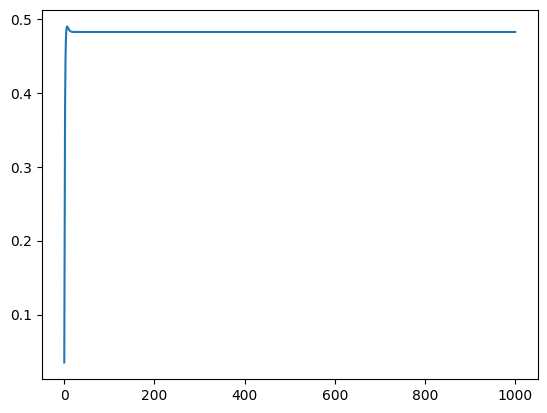

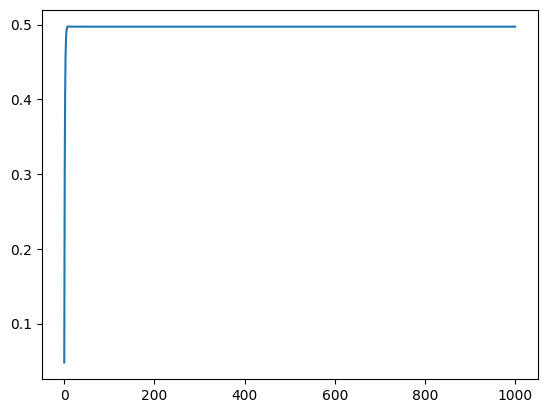

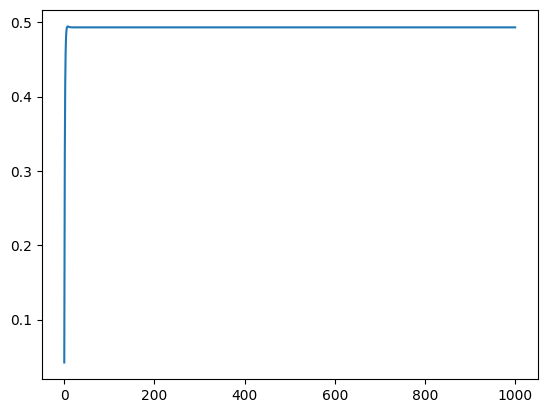

In [2]:
comp_points = [[3., 0.5], [4., 0.5], [3.5, 1.]]

N = 1
colors = []
n = 0
for col in mcolors.TABLEAU_COLORS:
    colors.append(col)
    n += 1
    if n >= N: break

model = WCModel()

dt = 0.1
model.params['dt'] = dt # Integration time step, ms
model.params['duration'] = 1. * 1000 # Simulation time, ms
model.params.signalV = 1.

for p in comp_points:
    model.params["exc_ext"] = p[0]
    model.params["inh_ext"] = p[1]
    model.run()

    plt.plot(model.t, model.exc[0,:], color=colors[0])
    plt.show()


In [3]:
controlmat = np.zeros((N,2))
controlmat[:,0] = 1.

costmat = np.zeros((N, 2))
costmat[:,0] = 1.

duration = 200.
model.params.duration = duration
zero_input0 = ZeroInput().generate_input(duration=duration+model.params.dt, dt=model.params.dt)
zero_input = np.vstack( ([zero_input0]*2) )[np.newaxis,:,:]
zero_control = np.vstack( ([zero_input]*N))

target_array = [10., 16.]

results = dict()
results["control"] = [ [ [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], ],
                       [ [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], ],
                       [ [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], ],
]
results["state"] = [   [ [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], ],
                       [ [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], ],
                       [ [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], ],
]

In [4]:

w2_array_A = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1.6*1e-3, 1.8*1e-3, 1.9*1e-3, 2*1e-3, 2.1*1e-3, 2.2*1e-3]
w2_array_A_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
w2_array_B = []
w2_array_C = []

w2_array = [[w2_array_A, w2_array_A_1], w2_array_B, w2_array_C]

In [41]:
for k in range(4,14):
    results["control"][0][0][k] = None

In [5]:
it = 40
maxstr = 20

pr = np.arange(0,1001,50)
init_control = zero_control.copy()
dir = "images_1n_up"

pind =  0
itar =  0
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.21372741704127846
Converged in iteration 3 with cost -0.21372741704127848
Final cost : -0.21372741704127848


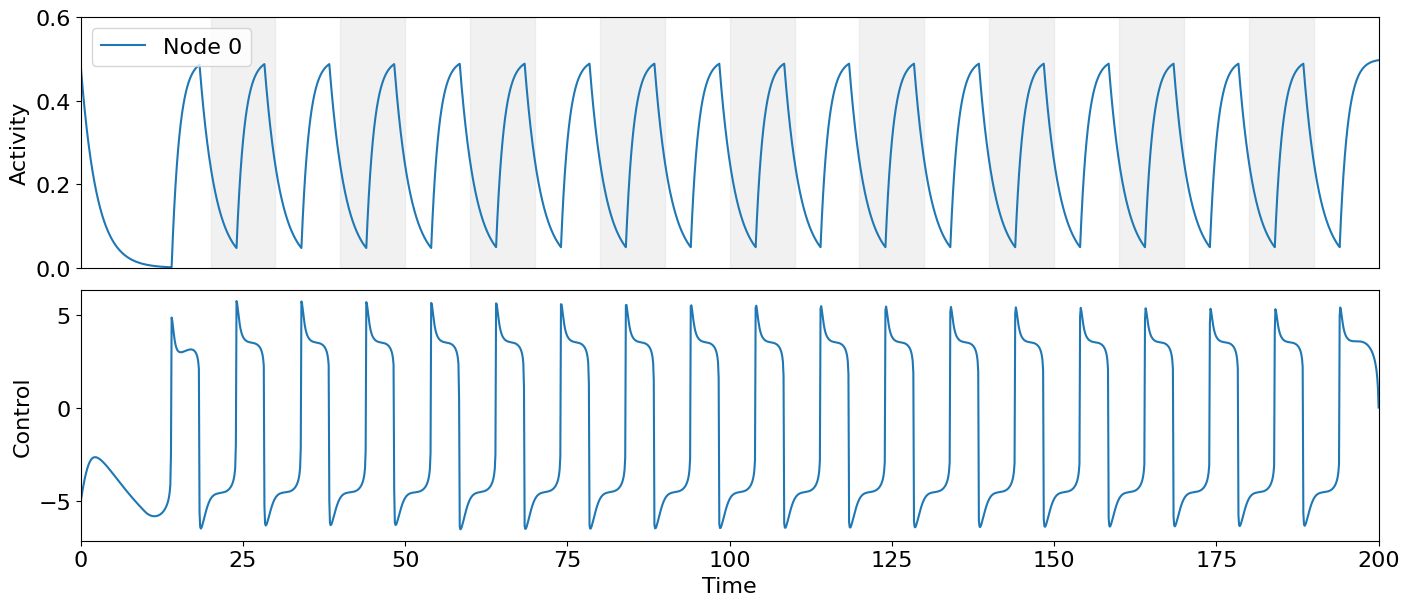

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.21261098446441237
Final cost : -0.21261122230546844


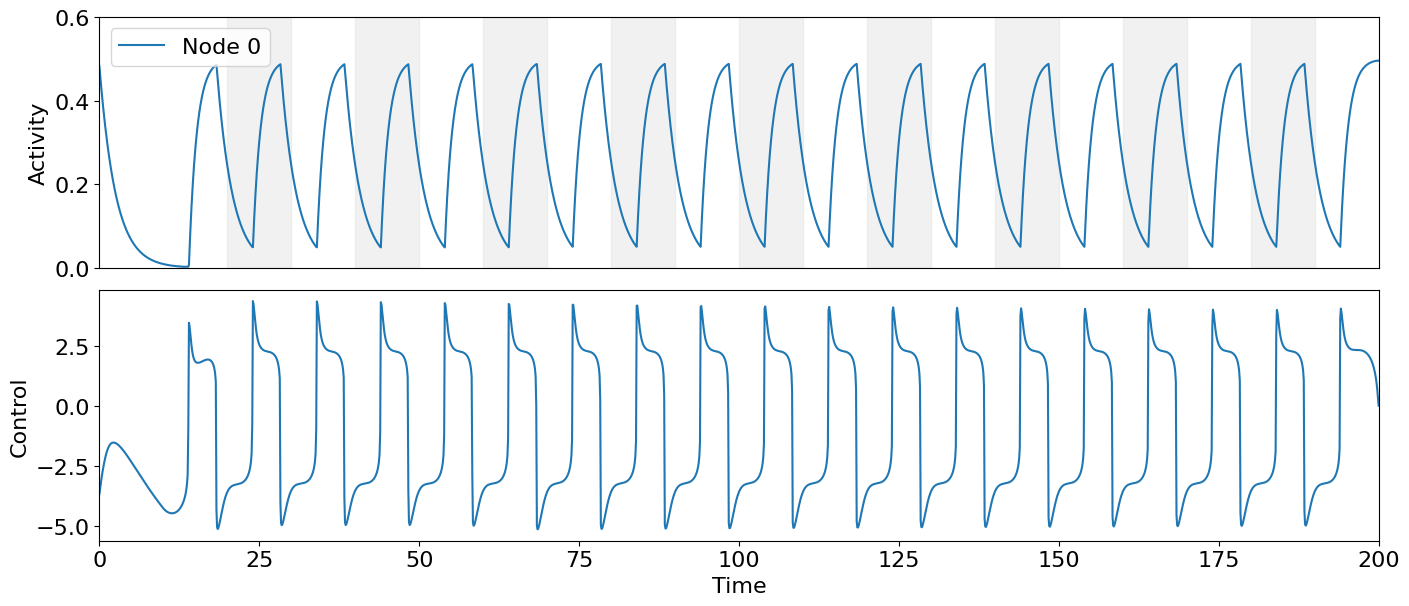

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.20760206640057927
Final cost : -0.20760214641163474


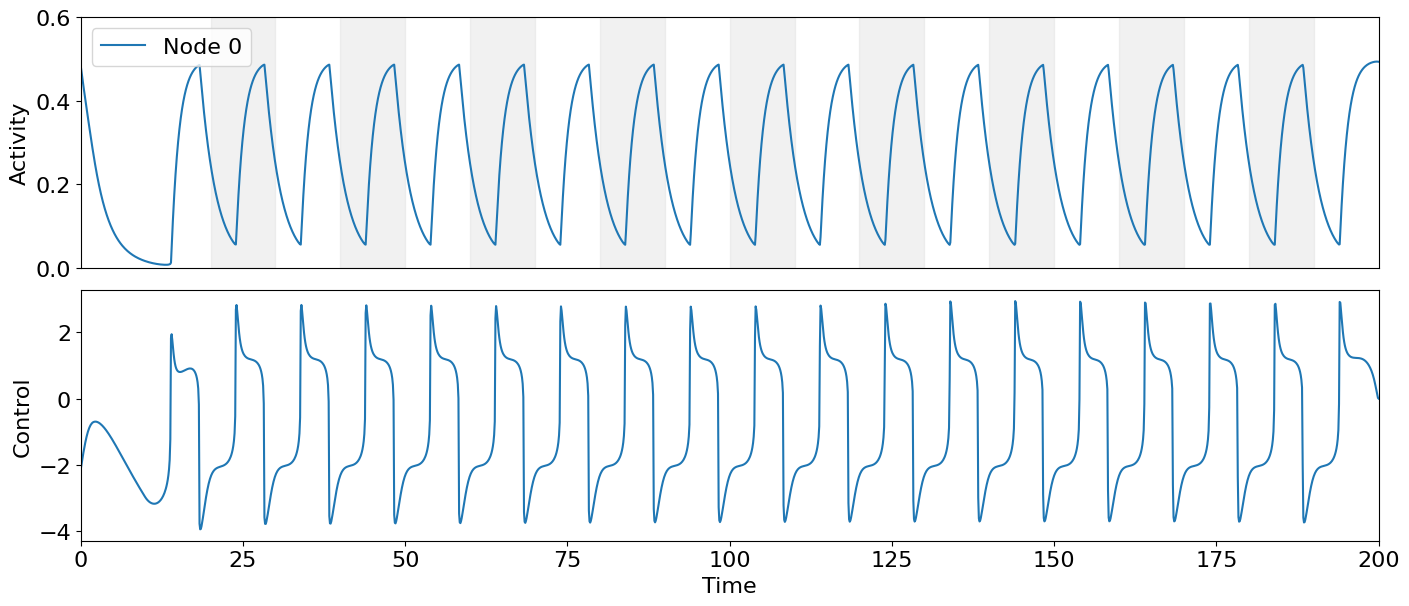

iw =  3
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.18936914370403216
Final cost : -0.18940007999197597


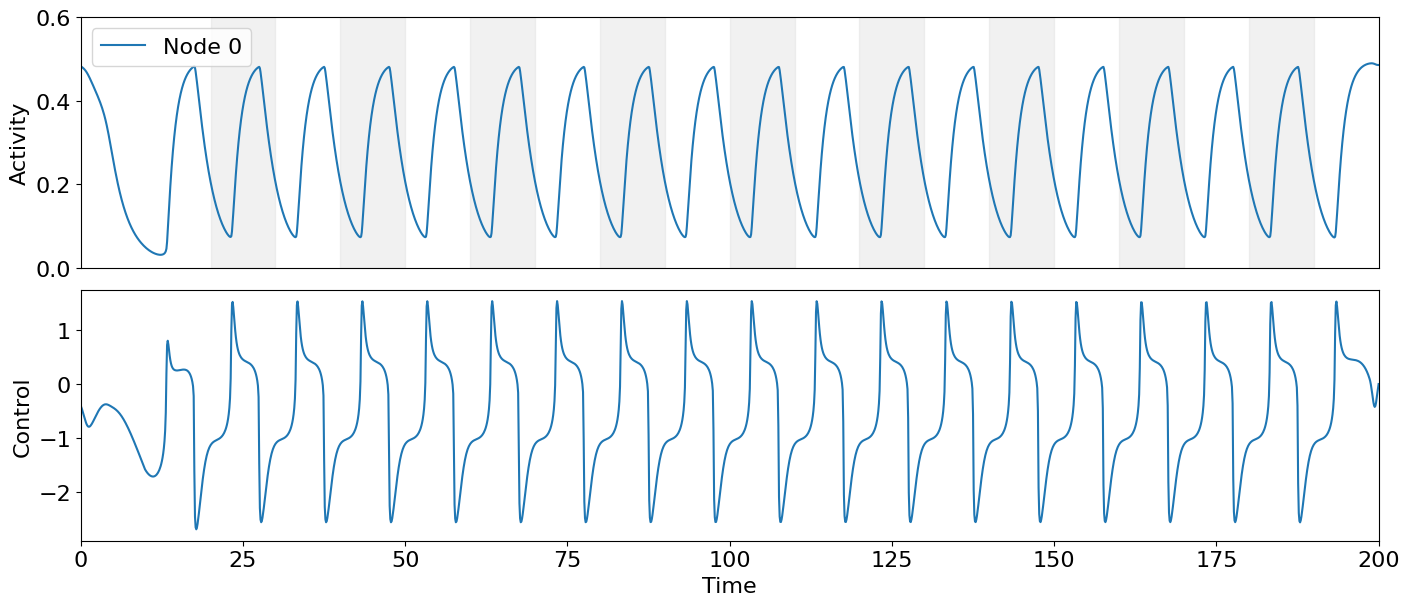

iw =  4
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.05421581790643098
Final cost : -0.05430056830829687


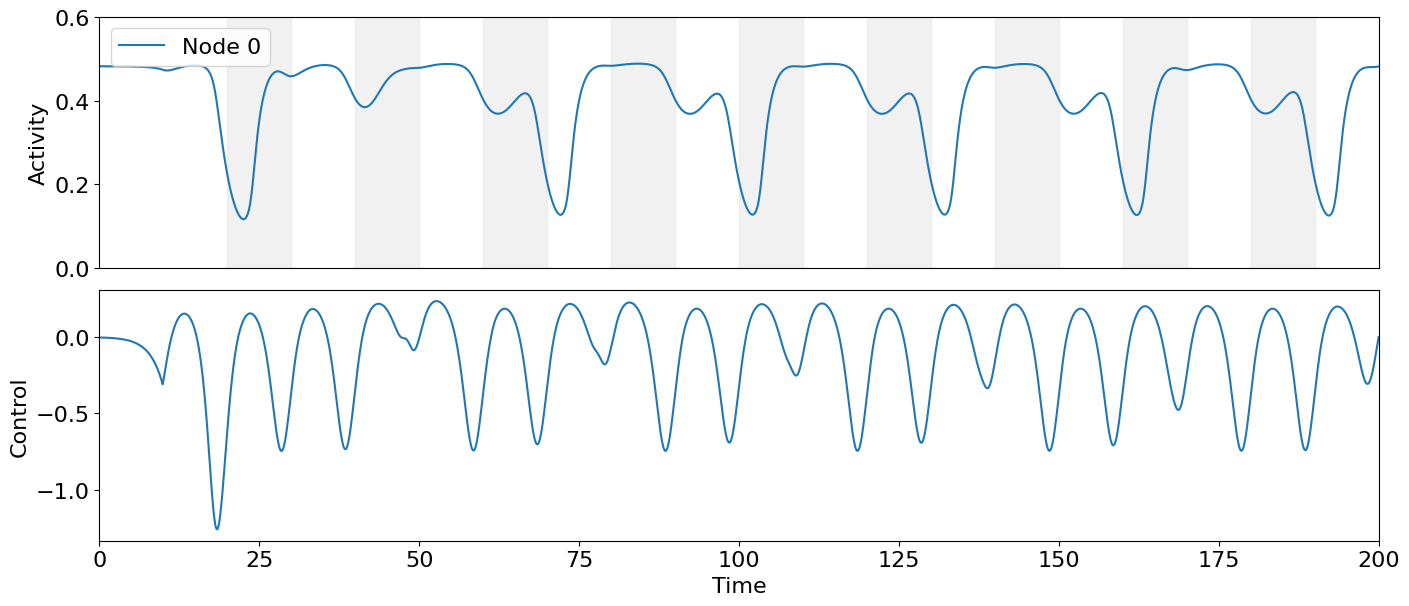

iw =  5
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.10309839706963818
Final cost : -0.10321398174397148


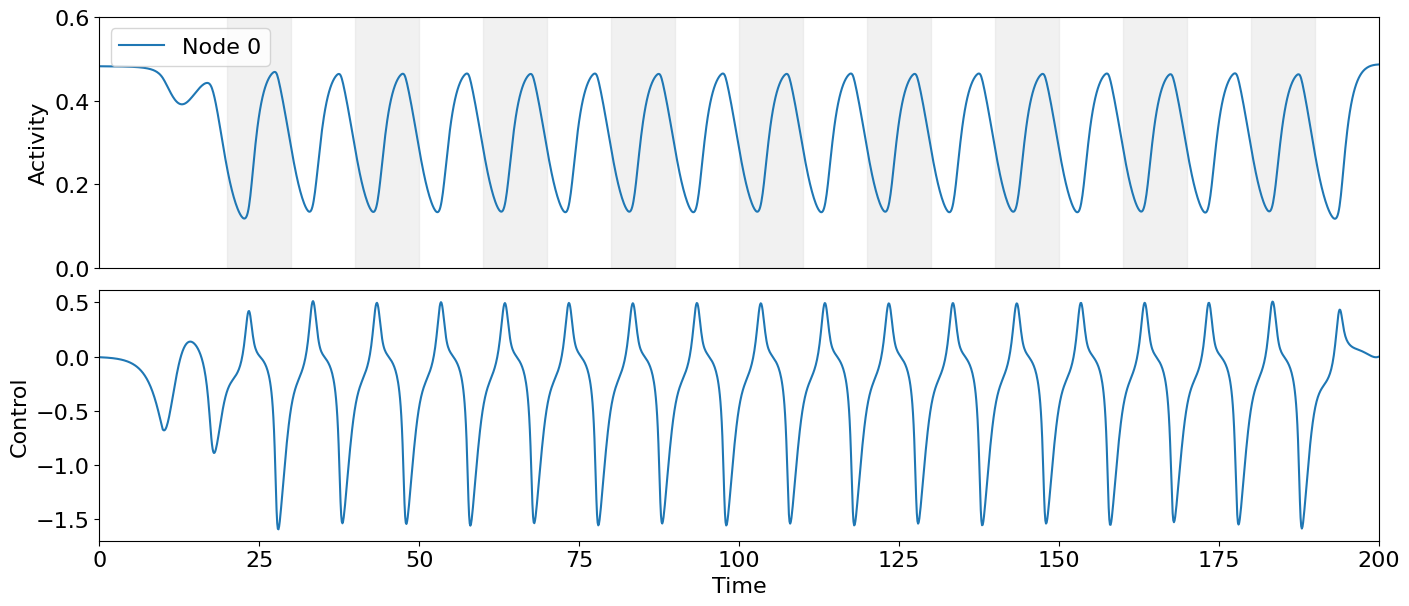

iw =  6
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.07485536347062902
Final cost : -0.0760526205681273


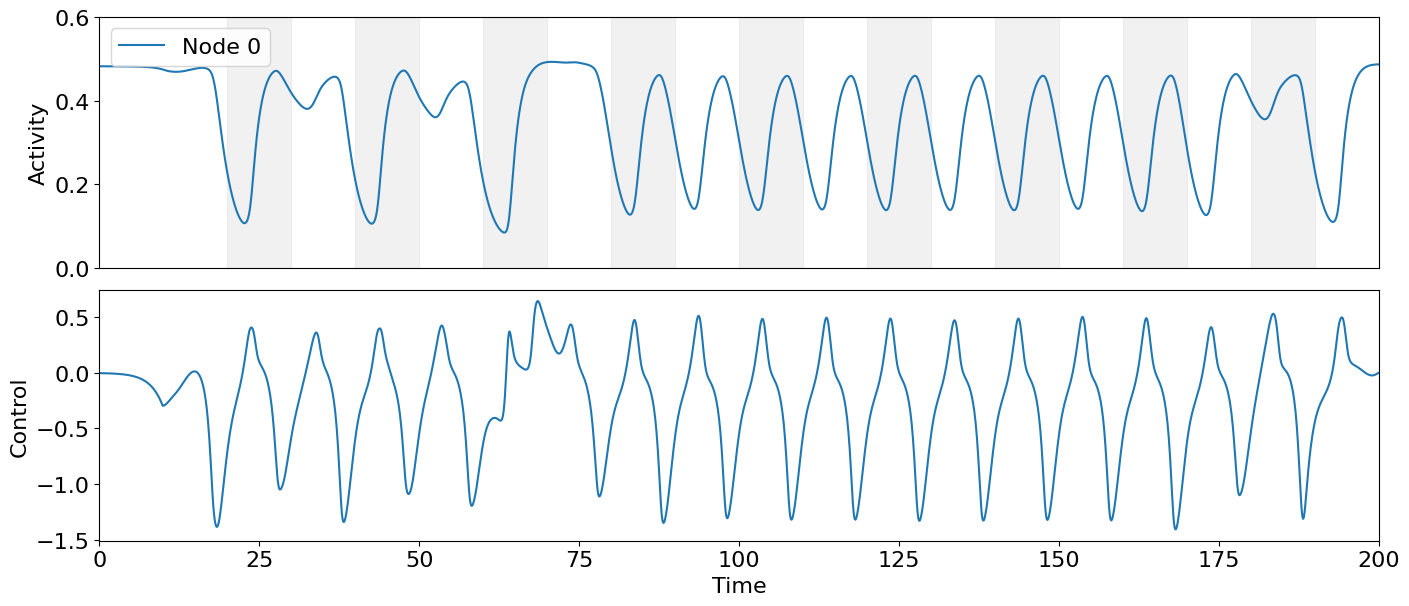

iw =  7
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.09311383801485396
Final cost : -0.09334010767084669


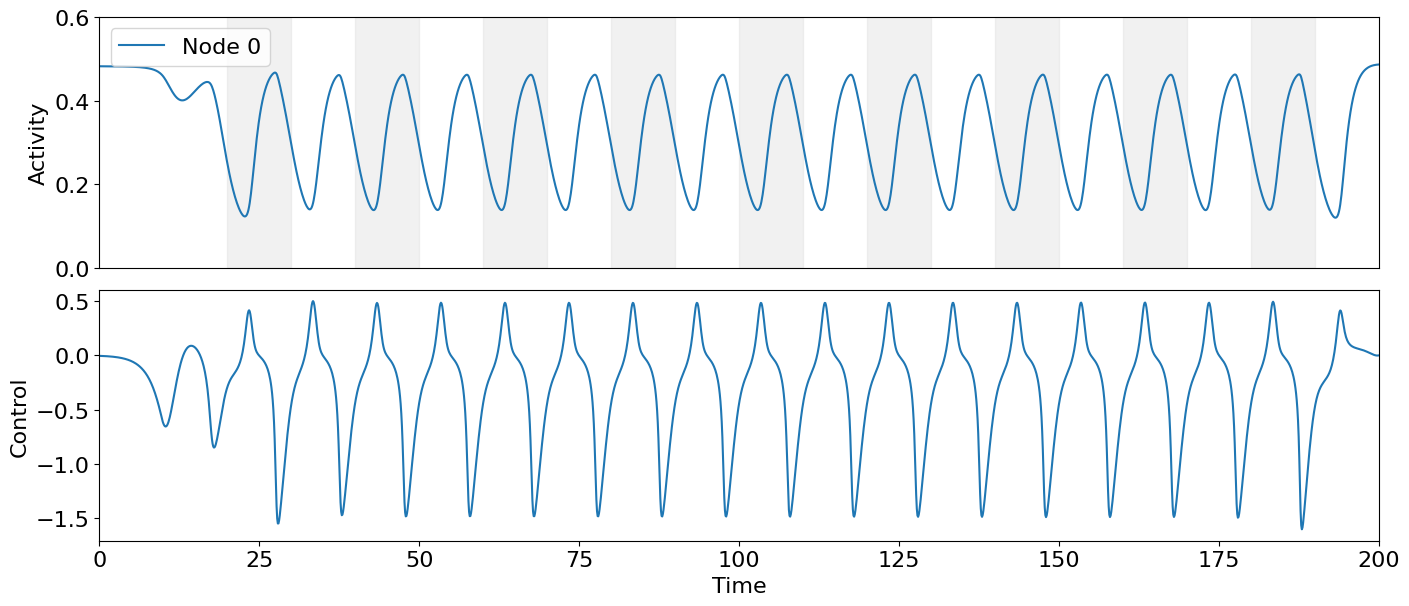

iw =  8
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.030972831429507713
Final cost : -0.030981873858565233


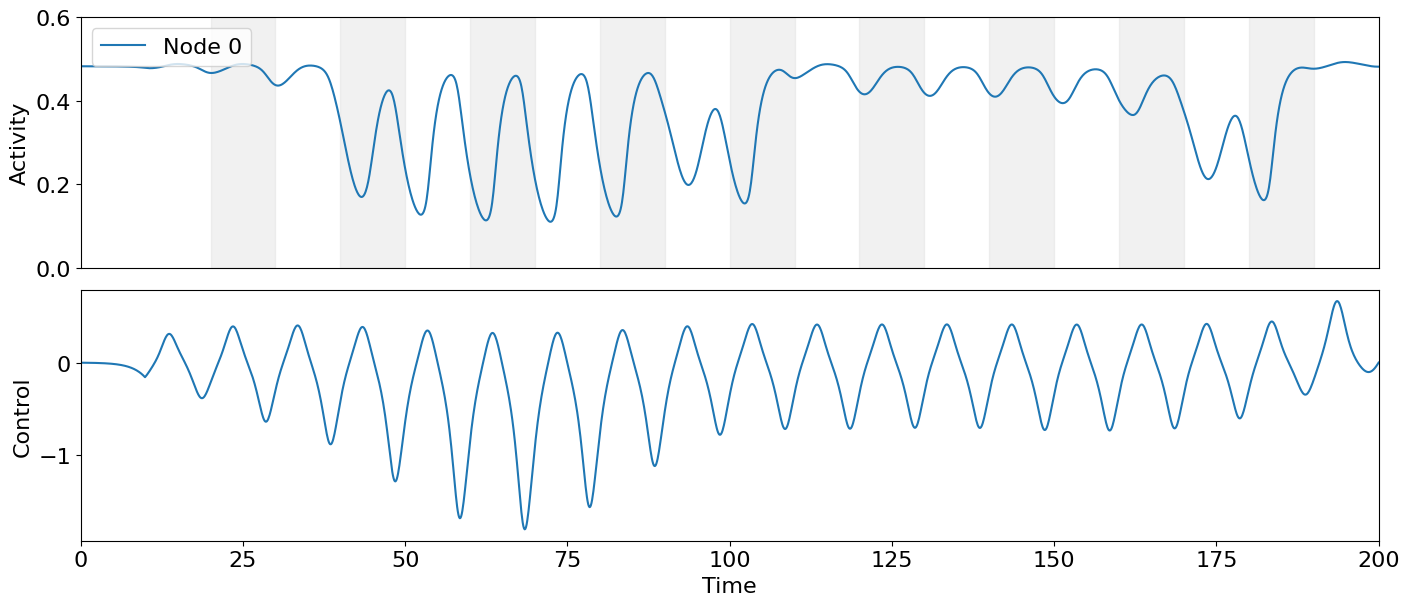

iw =  9
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0019903416056435076
Final cost : -0.0019988046158500063


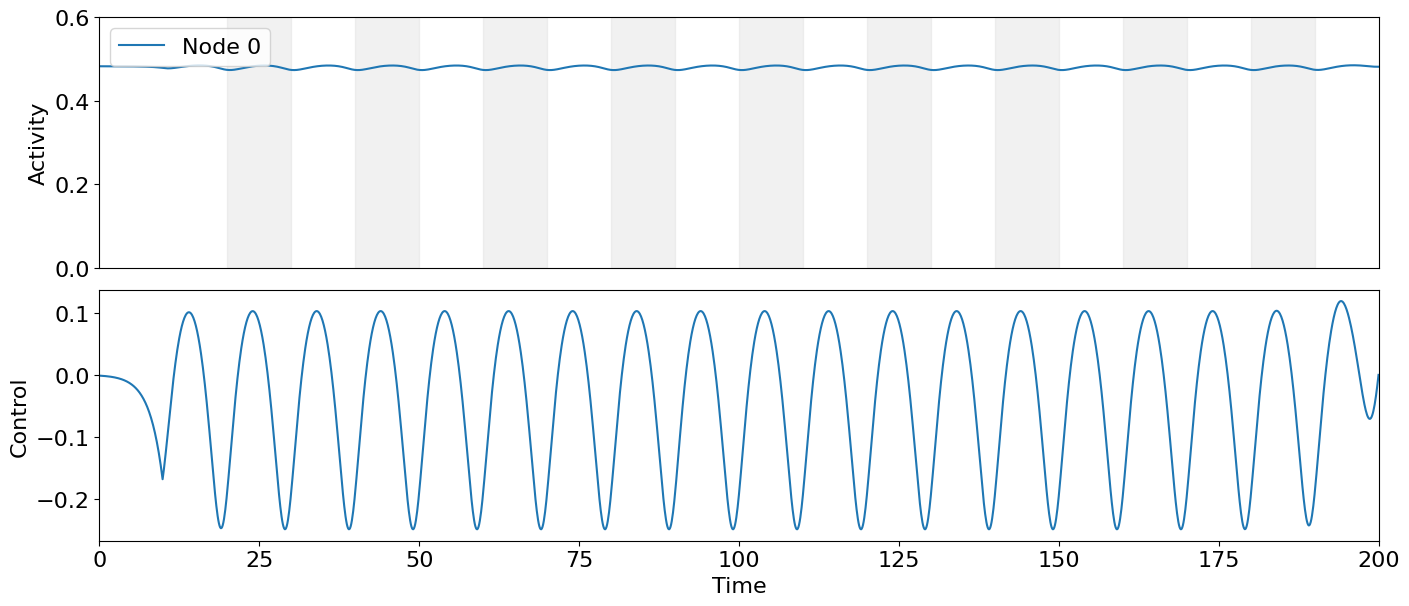

iw =  10
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.001853892490061512
Final cost : -0.0018589358230233295


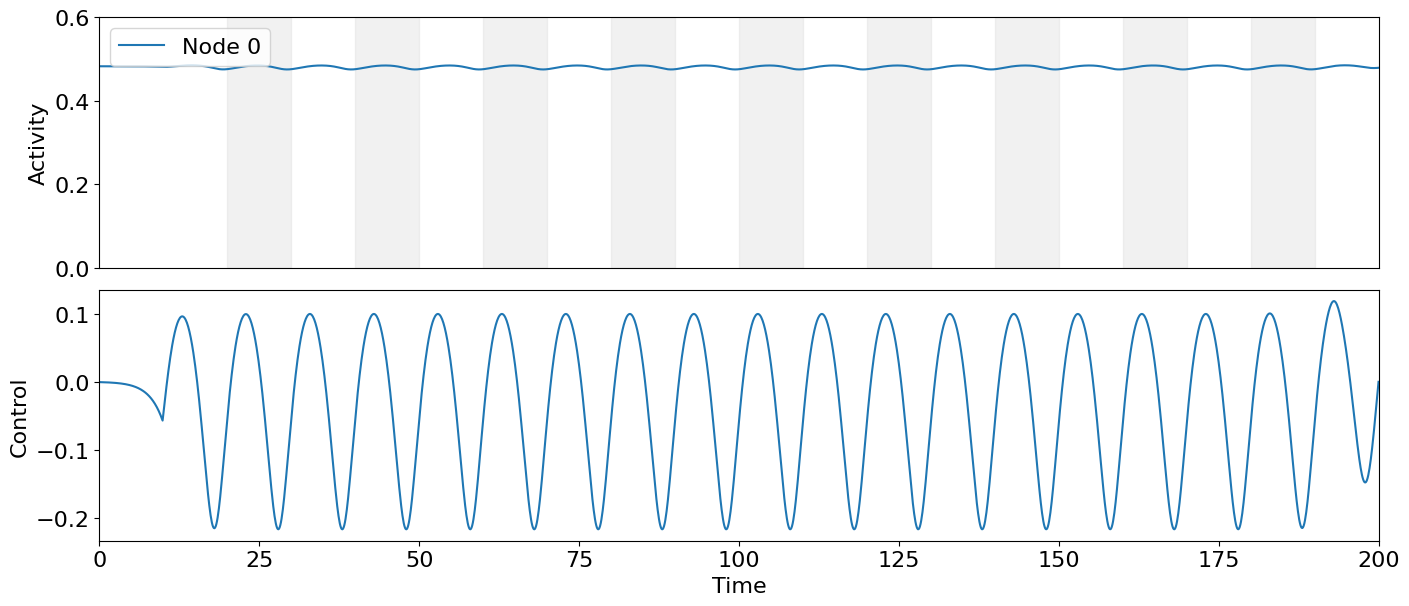

itar =  1
iw =  0
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2617214836599038
Final cost : -0.2617268460776874


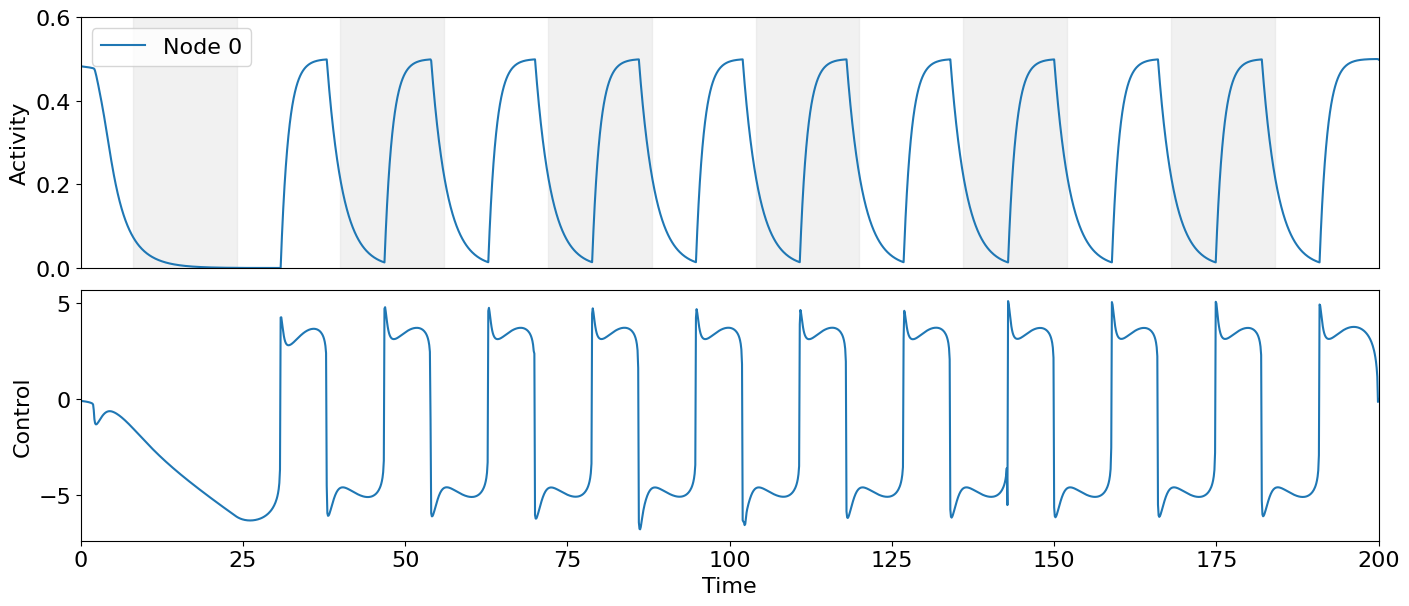

iw =  1
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.26065171142545246
Final cost : -0.26065489602589215


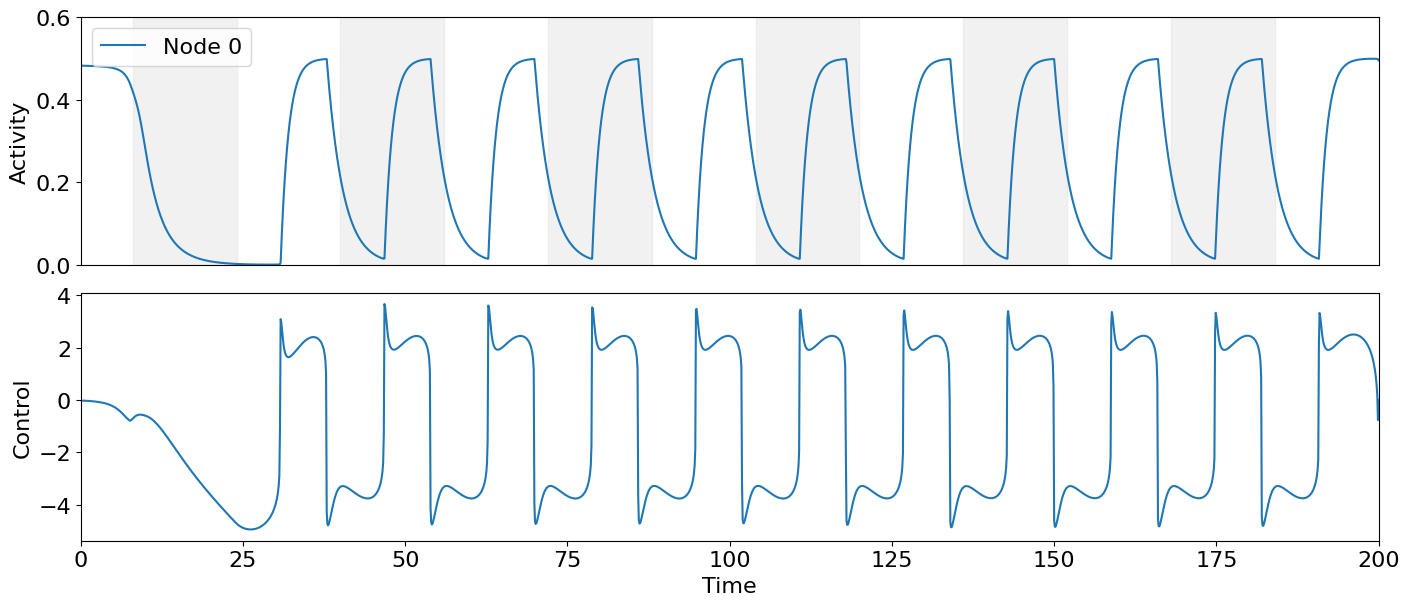

iw =  2
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.2554212717169017
Final cost : -0.25551746225859057


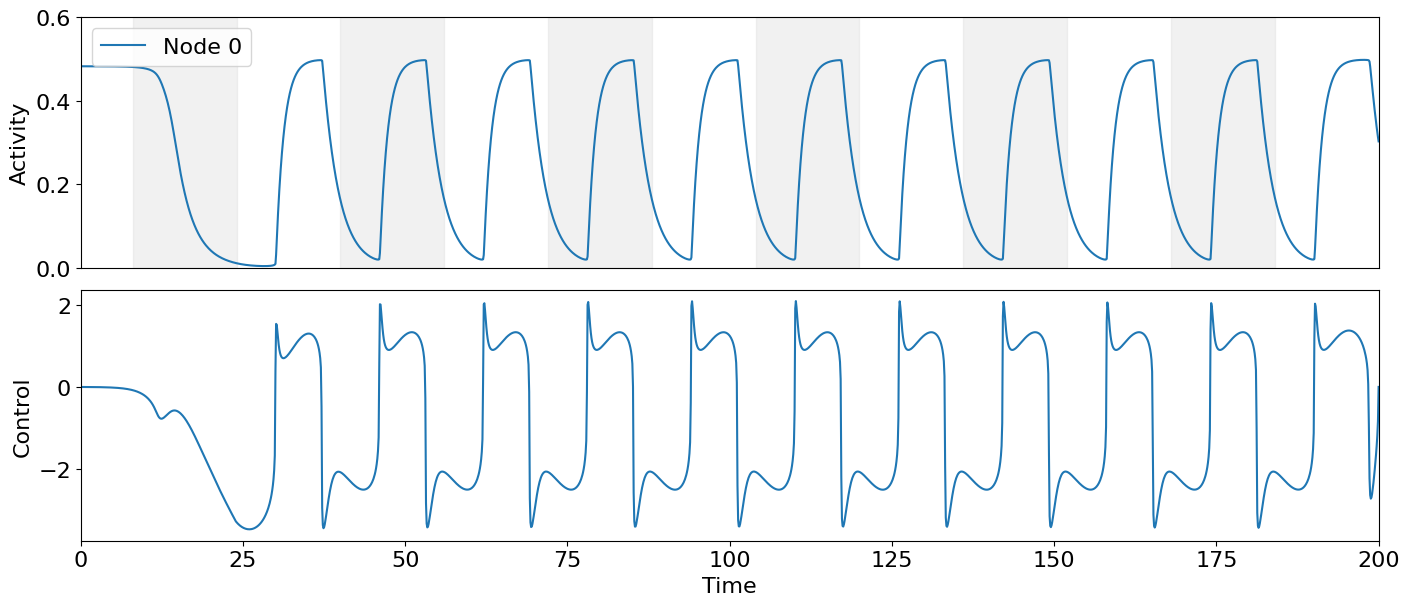

iw =  3
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.23846590595996353
Final cost : -0.23847638117486597


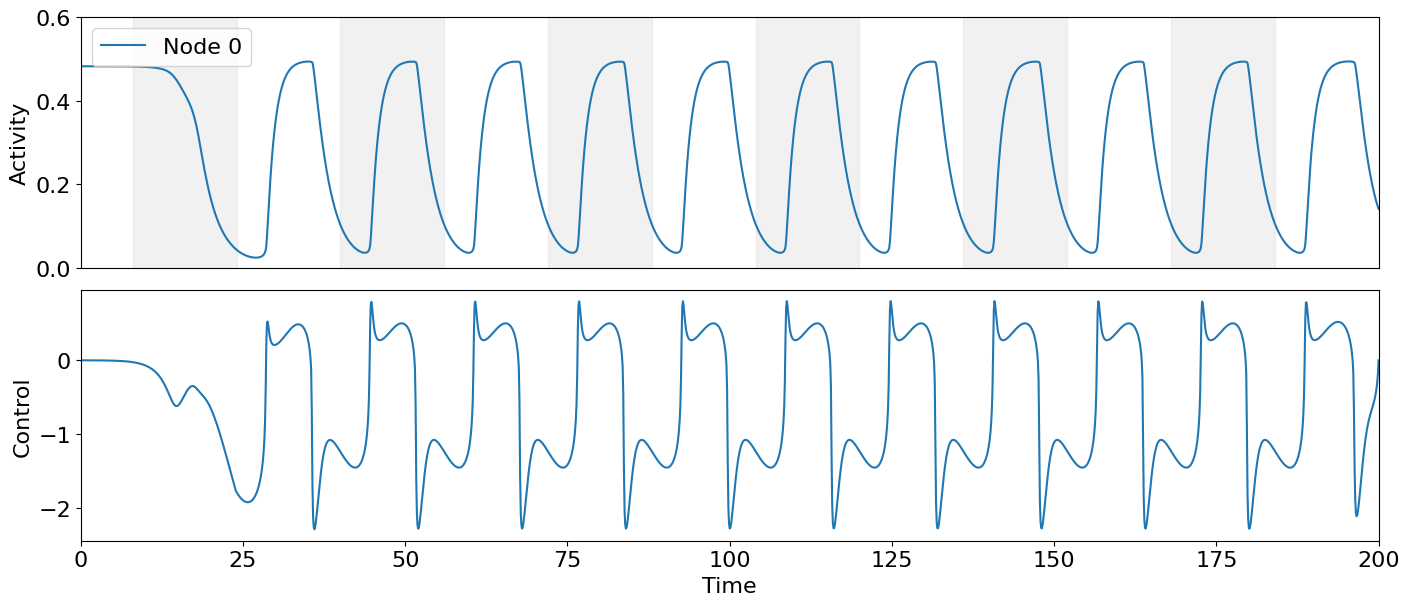

iw =  4
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.19790762934479952
Final cost : -0.19798568844155515


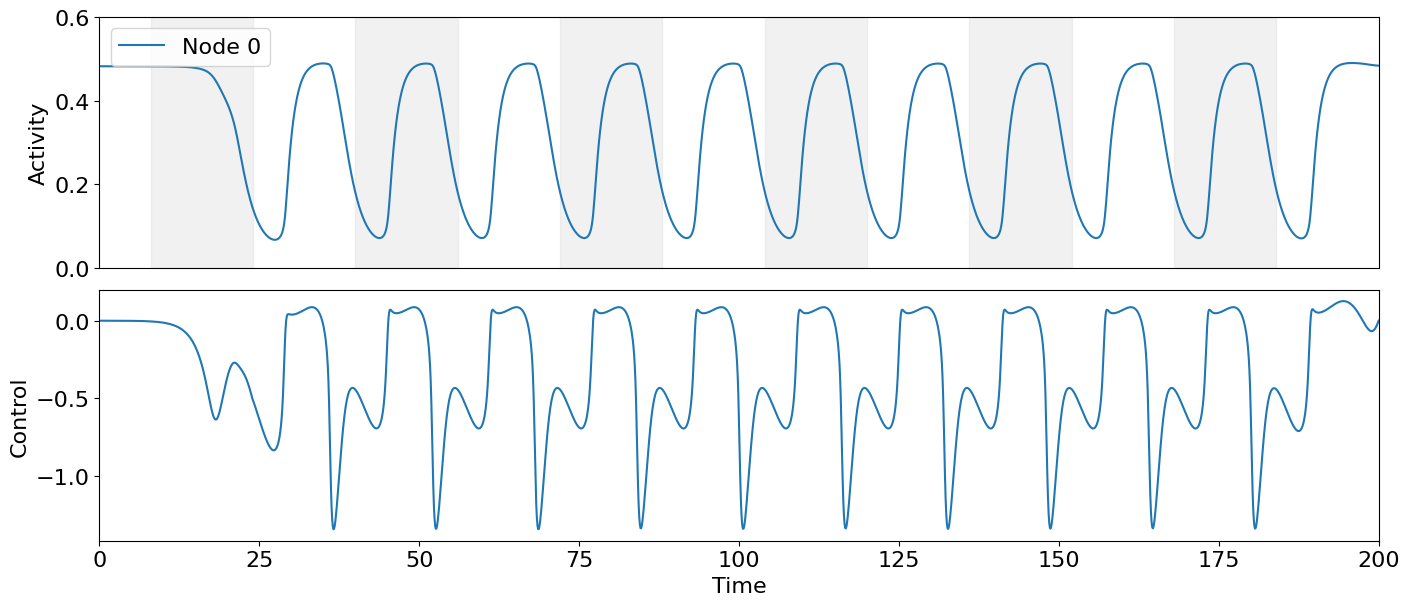

iw =  5
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -0.0006428854568225512
Final cost : -0.0006428958323619503


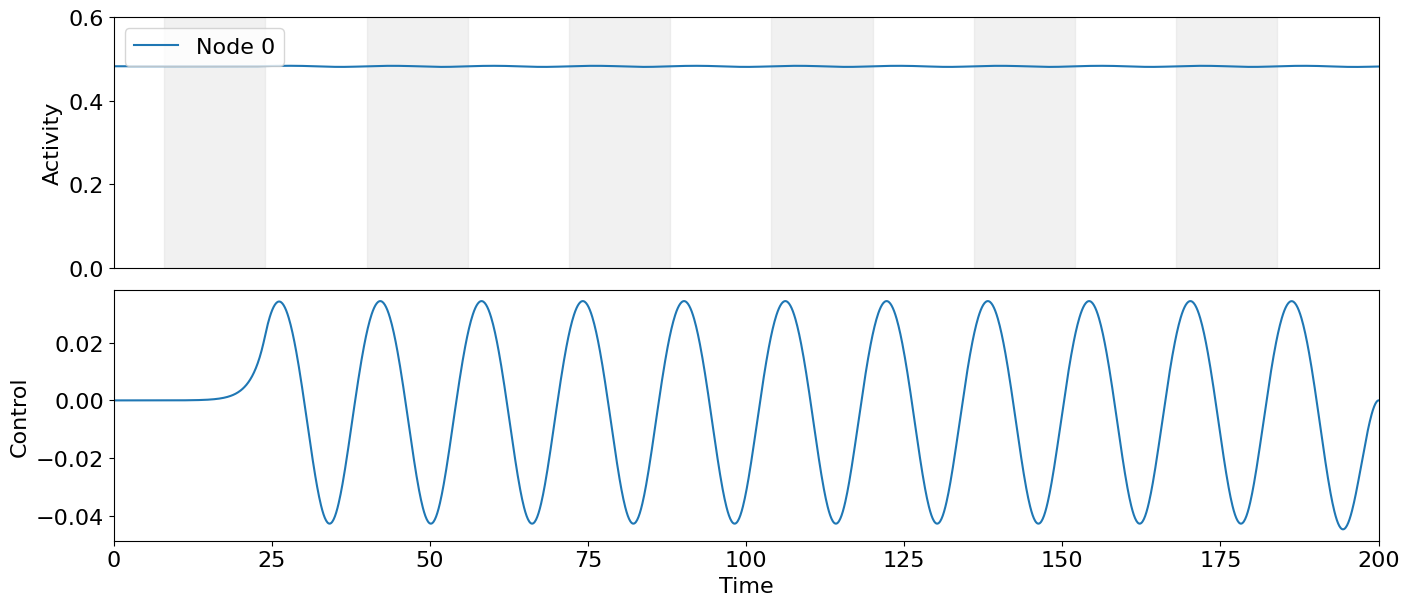

pind =  1
pind =  2


In [48]:
for pind in range(len(comp_points)):

    print("pind = ", pind)

    if pind not in [0]:
        continue

    p = comp_points[pind]
    
    testd = 1000.
    model.params.duration = testd
    test_input = ZeroInput().generate_input(duration=testd+model.params.dt, dt=model.params.dt)
    model.params["exc_ext"] = test_input + p[0]
    model.params["inh_ext"] = test_input + p[1]
    model.run()

    einit = np.zeros((N, 1))
    iinit = np.zeros((N, 1))


    for n in range(N):
        einit[n,:] = model.exc[n,-1]
        iinit[n,:] = model.inh[n,-1]

    model.params.duration = duration

    model.params["exc_ext"] = zero_control[:,0,:] + p[0]
    model.params["inh_ext"] = zero_control[:,0,:] + p[1]

    model.params["exc_init"] = einit
    model.params["inh_init"] = iinit

    model.run()

    for itar in range(len(target_array)):

        print("itar = ", itar)

        target_period = target_array[itar]
        i00 = 0
        int0 = np.around( (duration - i00 * target_period) / model.params.dt, 0).astype(int)     
        while int0 > 1.5*target_array[itar]/dt:
            i00 += 1
            int0 = np.around( (duration - i00 * target_period) / model.params.dt, 0).astype(int)

        for iw in range(len(w2_array[pind][itar])):

            print("iw = ", iw)
                
            w2 = w2_array[pind][itar][iw]

            model_controlled = oc_wc.OcWc(model, target_period, print_array=pr, cost_interval=(int0,None), cost_matrix=costmat, control_matrix = controlmat)
            model_controlled.weights["w_p"] = 0.
            model_controlled.weights["w_2"] = w2
            model_controlled.weights["w_f"] = 1.

            model_controlled.maximum_control_strength = maxstr

            if type(results["control"][pind][itar][iw]) != type(None):
                model_controlled.control = results["control"][pind][itar][iw].copy()
                model_controlled.update_input()

            model_controlled.optimize(it)
            results["control"][pind][itar][iw] = model_controlled.control.copy()
            results["state"][pind][itar][iw] = model_controlled.get_xs()

            fname = str(pind) + "_" + str(itar) + "_" + str(iw) + ".png"
            plot_oc_nw(N, duration, dt, model_controlled.get_xs(), target_period,  model_controlled.control, filename= os.path.join(dir, fname))

In [8]:
with open('osc_1n_up.pickle', 'wb') as f:
    pickle.dump(results, f)

In [6]:
with open('osc_1n_up.pickle', 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

results = res_read.copy()

dict_keys(['control', 'state'])


In [7]:
def getseg(x, u, period):
    peaks = scipy.signal.find_peaks(x, prominence=0.1)[0]
    if len(peaks) < 5:
        return None
        
    per = np.round(period/dt).astype(int)

    meanseg = u[:,:,peaks[1]:peaks[1]+per+1]
    for i in range(2, len(peaks)-2):
        meanseg += u[:,:,peaks[i]:peaks[i]+per+1]
    meanseg /= (len(peaks) - 1)

    return meanseg

TypeError: 'NoneType' object is not subscriptable

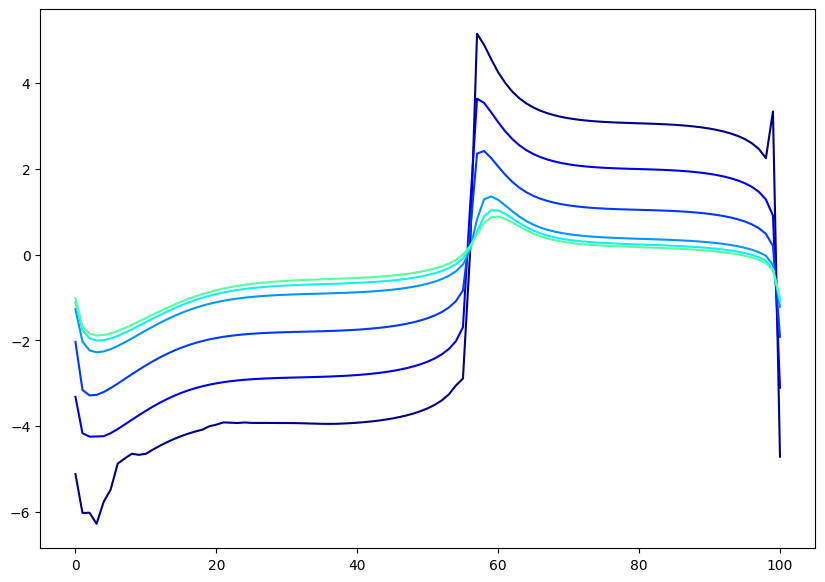

In [10]:
pind, itar = 0,0
cols = plt.get_cmap('jet')

fig, ax = plt.subplots(figsize=(10,7))

for iw in range(len(w2_array[pind][itar])):
    seg = getseg(results["state"][pind][itar][iw][0,0,:], results["control"][pind][itar][iw], target_array[itar])

    if seg is None:
        continue

    ax.plot(seg[0,0,:], color=cols(iw/len(w2_array[pind][itar])), label=np.round(w2_array[pind][itar][iw],7))

ax.legend(ncol=2)
plt.show()

0
1e-07
1
1e-06
2
1e-05
3
0.0001
4
0.001
5
0.0016
6
0.0018000000000000002


TypeError: bad operand type for abs(): 'NoneType'

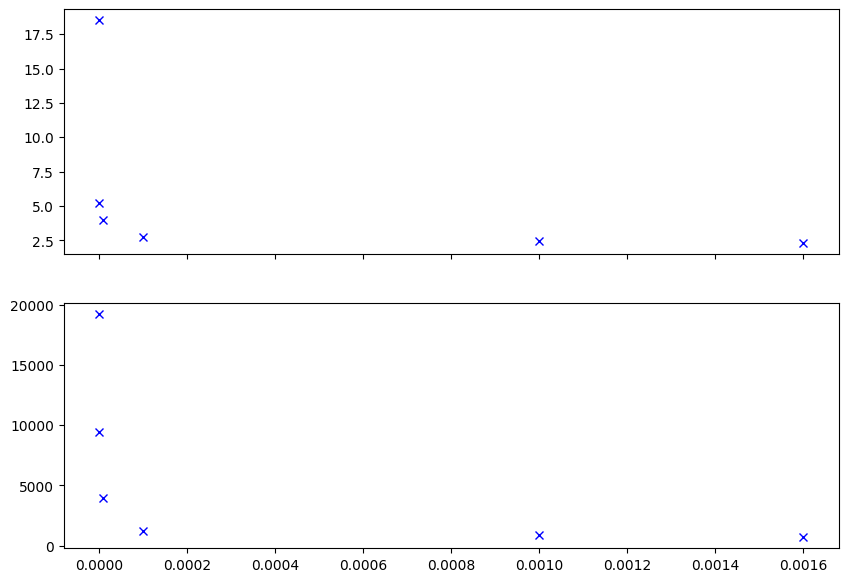

In [15]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(10,7))

pind, itar = 0,0

for iw in range(len(w2_array[pind][itar])):
    print(iw)
    ax[0].plot(w2_array[pind][itar][iw], np.amax(np.abs(results["control"][pind][itar][iw])), marker="x", color="blue")
    f2cost = np.sum(cost_functions.L2_cost(results["control"][pind][itar][iw]))
    ax[1].plot(w2_array[pind][itar][iw], f2cost, marker="x", color="blue")

ax[0].set_xscale("log")

ax[0].set_ylabel("Amplitude")
ax[1].set_ylabel(r"$F_2$")

plt.show()